## Machine Learning Lab Practical 4 (16/08/2024)

ชื่อ นายฉัตรดนัย ปูทอง

ชื่อเล่น เอิร์ท

รหัสนักศึกษา 116510462029-9

Email : earthtyjoy11@gmail.com

# Lab Practical Guideline


**วัตถุประสงค์**

1. เพื่อเรียนรู้การทำงานของโมเดลถดถอยเชิงเส้น cost function และ อัลกอริทึมการเรียนรู้ Gradient Descent

**ขั้นตอนการฝึกปฏิบัติการ**

1. สร้างเอกสารบน colab และตั้งชื่อไฟล์เป็น 'mllab03-LinaerRegression1.ipynb'
2. สร้างหัวเอกสาร ใส่ชื่อ รหัส นศ. และ e-mail ของตนเอง โดยดูตามเอกสารตัวอย่างเพจนี้
3. ศึกษาและทดลองการใช้งาน linear regression, cost function และ Gradient Descent ตามเอกสารตัวอย่างเพจนี้



**การส่งผลงาน**
1. ให้ share เอกสารที่ นศ. ทำมายัง อาจารย์ผู้สอน และผู้ช่วยสอน e-mail jedsada.phengsuwan@gmail.com และ kititach.k@en.rmutt.ac.th  *โดยกำหนดสิทธิ์เป็น Commenter*  [ดูตัวอย่าง](https://raw.githubusercontent.com/phengsuwan/ML04622316/f9e6a12ea0521de9ee991aeb3813b306ae6c8013/figures/submit.png)
2. เพิ่ม link ผลงานเข้าไปในหน้า Profile ของตนเอง
2. กำหนดส่งภายใน 21/08/2024



# 1. การพัฒนาโมเดล K-Means  Clustering

ให้ นศ. พัฒนาโมเดล K-Mean Clustering โดยใช้ข้อมูล Customer Segmentation จากแหล่งข้อมูลต่อไปนี้
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

​** นศ. สามารถใช้ Generative AI เป็นตัวช่วยให้การสร้างโมเดลได้

> 1.1 Download Dataset จาก URL ข้างต้น โดยใช้ Prompt ดังนี้

Prompt: *Download and unzip dataset from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python*

In [ ]:
# prompt: Download and unzip kaggle dataset from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip customer-segmentation-tutorial-in-python.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.06MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


> 1.2 อ่านไฟล์ข้อมูลที่ Download ให้อยู่ในรูปแบบของ DataFrame โดยใช้ Prompt ดังนี้

Prompt: *Load dataset to dataframe*

In [ ]:
# prompt: Load dataset to dataframe

import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


> 1.3 แสดงข้อมูลบนกราฟในรูปแบบ scatter plots โดยใช้ Prompt ดังนี้

Prompt: *generate scatter plots of field 'Age' and 'Annual Income (k$)'*

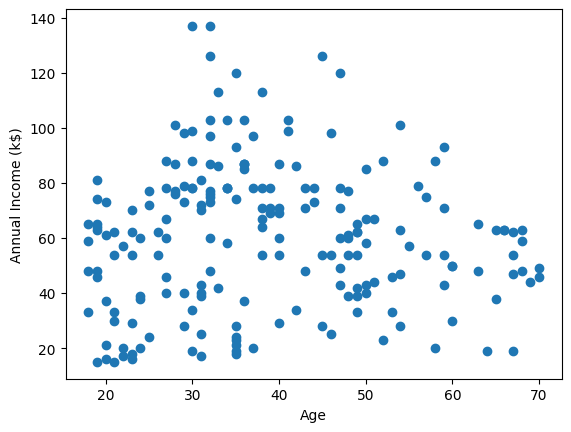

In [ ]:
# prompt: generate scatter plots of field 'Age' and 'Annual Income (k$)'

import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


> 1.4 Normalize ข้อมูล Fields  'Age' and 'Annual Income (k$)' โดยใช้ Prompt ดังนี้

Prompt: *normalize field 'Age' and 'Annual Income (k$)'*

In [ ]:
# prompt: normalize field 'Age' and 'Annual Income (k$)'

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Annual Income (k$)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40


> 1.5 ใช้ K-Means Clustering ในการจัดกลุ่มข้อมูลใน dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


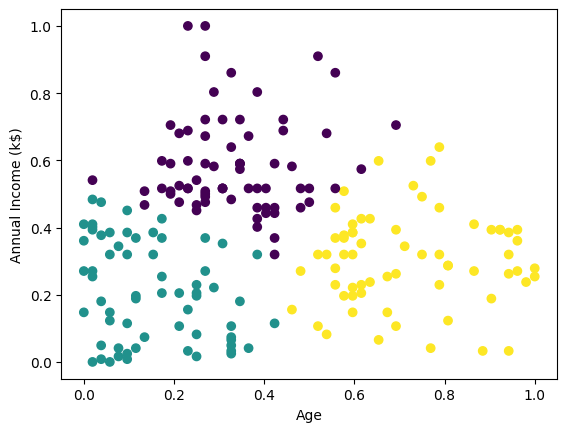

In [ ]:
# prompt:  K-Means Clustering to group data in dataset

from sklearn.cluster import KMeans

# Assuming you want 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Annual Income (k$)']])

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the dataframe
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


> 1.6 แสดงกราฟ scatter plot โดยแสดงจุด Centroids บนกราฟด้วย

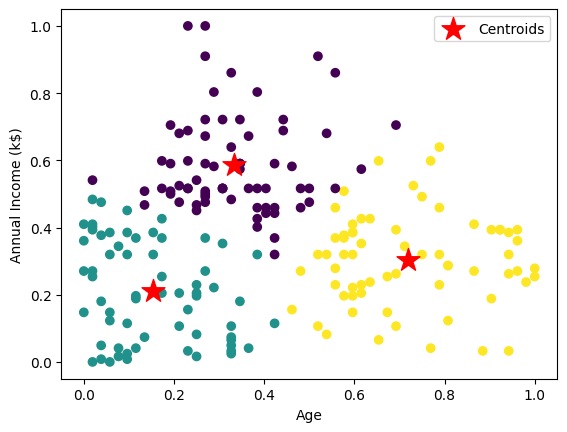

In [ ]:
# prompt: show scatter plot and show Centroids star on graft

# Calculate the centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


> 1.7 ใช้ Elbow method เพื่อหาจำนวน Cluster ที่เหมาะสม

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

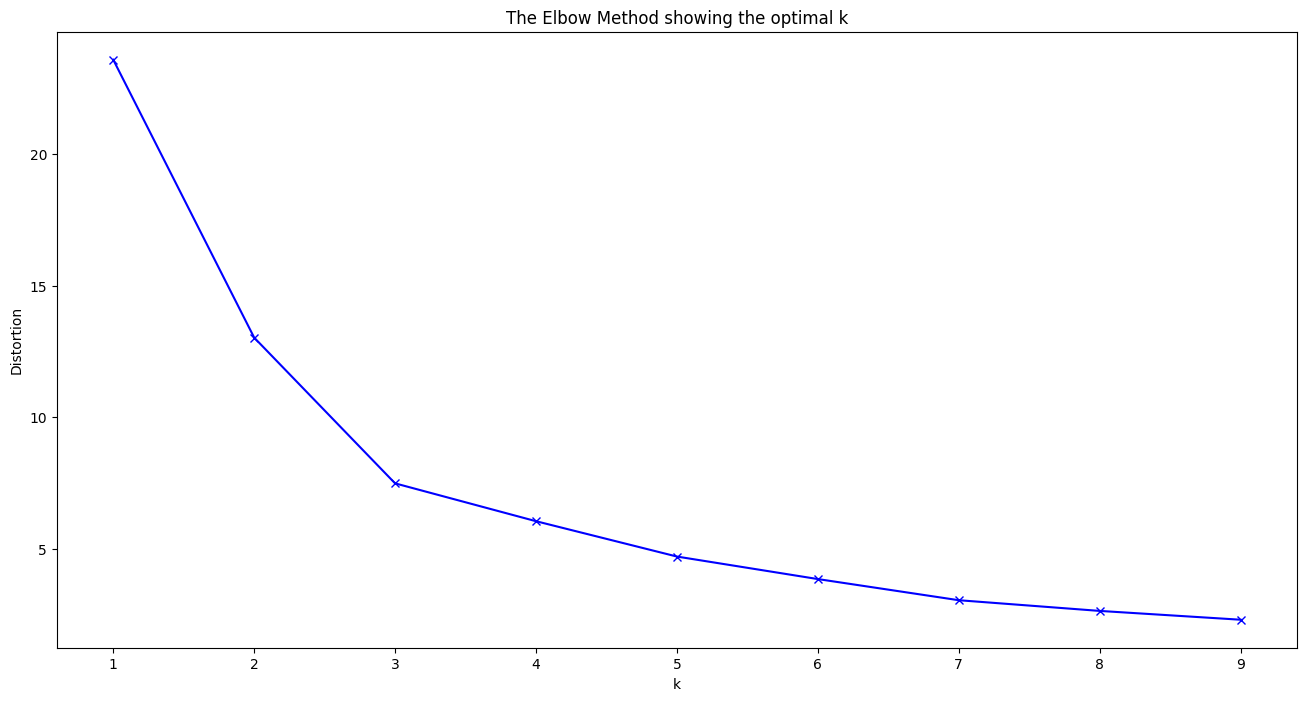

In [ ]:
# prompt: use Elbow method to find the most appropriate number of Cluster

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# calculate distortion for a range of number of cluster
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['Age', 'Annual Income (k$)']])
    distortions.append(kmeanModel.inertia_)
# plot
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



> 1.8 ใช้ K-Means Clustering ในการจัดกลุ่มข้อมูลใน dataset โดยเลือกค่า K ที่ได้จากข้อ 1.7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


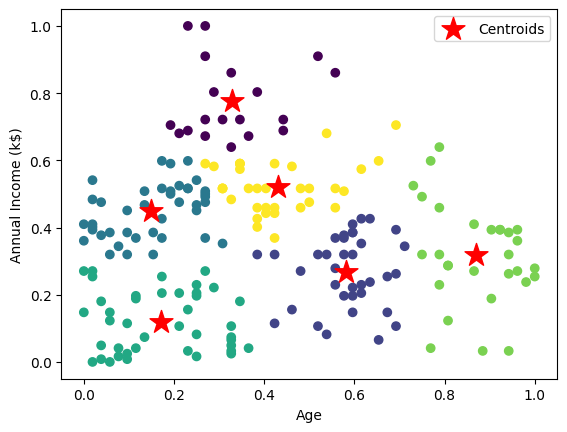

In [ ]:
# prompt: K-Means Clustering to group data in dataset star marker form Elbow method. when K =  6

# K-Means Clustering with K=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(df[['Age', 'Annual Income (k$)']])

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the dataframe
df['Cluster'] = labels

# Calculate the centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()
